# 소규모 데이터셋에서 컨브넷 모델 구축하기
* 매우 적은 데이터를 사용해 이미지 분류 모델을 훈련하는 일은 흔한 경우입니다. 여러분이 전문적인 컴퓨터 비전 작업을 한다면 실제로 이런 상황을 마주치게 될 가능성이 높습니다.
* 보통 '적은' 샘플이란 수백 개에서 수만 개 사이를 의미합니다.
* 실용적인 예제로 5,000개의 강아지와 고양이 사진(2,500개는 강아지, 2,500개는 고양이)으로 구성된 데이터셋에서 강아지와 고양이 이미지를 분류해 보겠습니다. 훈련을 위해 각각 1,500개의 사진을 사용하고 검증과 테스트에 각각 500개의 사진을 사용하겠습니다.
* 이제 1,500개의 훈련 이미지, 500개의 검증 이미지, 500개의 테스트 이미지가 준비되었습니다. 분할된 각 데이터는 클래마다 동일한 개수의 샘플을 포함합니다. 균형잡힌 이진 분류 문제이므로 정확도를 사용해 성공을 측정하겠습니다.

## 데이터 전처리하기

데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다. 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따릅니다.

1.	사진 파일을 읽습니다.
2.	JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
3.	그다음 부동 소수 타입의 텐서로 변환합니다.
4.	픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).

In [ ]:
test = 1

In [0]:
%matplotlib inline

In [0]:
import glob  # 파일 목록 처리 패키지, 파일 내용 처리 패키지 : pickle 
import numpy as np
import matplotlib.pyplot as plt
# import  load_img, img_to_array, array_to_img, ImageDataGenerator
.................

In [0]:
if test:
    IMG_DIM = (150, 150)

    train_files = glob.glob('training_data/*')
    # img 파일 로딩 후 img -> array 변환하여 저장
    train_imgs = [ ............ for img in train_files]

    print(type(train_imgs), len(train_imgs))

In [0]:
if test:
    train_imgs = np.array(train_imgs)

    print(type(train_imgs))
    print(train_imgs.shape, train_imgs.dtype)

In [0]:
if test:
    tmp = [fn for fn in train_files]
    print(tmp[:2])
    print(tmp[0].split('\\')[1])
    print(tmp[0].split('\\')[1].split('.'))

In [0]:
if test:
    train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]
    print(len(train_labels), train_labels[:3], train_labels[1500:1503])

In [10]:
IMG_DIM = (150, 150)

if test:
    train_files = glob.glob('training_data/*')
    train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]  # list, len:3000
    train_imgs = np.array(train_imgs)  # ndarray, shape:(3000, 150, 150, 3)
    # train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]  # for Linux
    train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]  # for Windows
print(train_labels[:3], train_labels[1500:1503])

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
# validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]  # for Linux
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]  # for Windows
print(validation_labels[:3], validation_labels[500:503])

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

['dog', 'dog', 'dog'] ['cat', 'dog', 'dog']
['cat', 'cat', 'cat'] ['dog', 'dog', 'dog']
Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


<class 'numpy.ndarray'> (150, 150, 3) [[106.  60.  24.]
 [109.  61.  23.]
 [107.  63.  28.]]


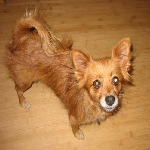

In [11]:
if test:
    print(type(train_imgs[0]), train_imgs[0].shape, train_imgs[0][0][:3])
    array_to_img(train_imgs[0])

In [0]:
# train_imgs/validation_imgs 데이터 타입을 float32로 변경함
train_imgs_scaled = train_imgs._____('float32')
validation_imgs_scaled  = validation_imgs._____('float32')

# train_imgs_scaled/validation_imgs_scaled 데이터를 0~1 값으로 정규화함
train_imgs_scaled /= ___
validation_imgs_scaled /= ___

<class 'numpy.ndarray'> (150, 150, 3) [[0.41568628 0.23529412 0.09411765]
 [0.42745098 0.23921569 0.09019608]
 [0.41960785 0.24705882 0.10980392]]


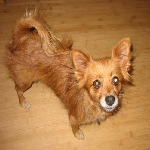

In [13]:
print(type(train_imgs[0]), train_imgs[0].shape, train_imgs_scaled[0][0][:3])
array_to_img(train_imgs_scaled[0])

In [14]:
# 3000/32 = 93.75,   3000/30 = 100
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import _______

le = ______
le.____(train_labels)
train_labels_enc = le.______(train_labels)
validation_labels_enc = le.______(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 1 0 1 1 1 1]


## 네트워크 구성하기
* `Conv2D`(`relu` 활성화 함수 사용)와 `MaxPooling2D` 층을 번갈아 쌓은 컨브넷을 만들겠습니다.
* CONV(F:3x3, 16) -> POOL(2x2) -> CONV(F3x3, 64) -> POOL(2x2) -> CONV(F3x3, 128) -> POOL(2x2) -> CONV(F3x3, 128) -> POOL(2x2) -> Flatten -> DENSE(512) -> DENSE(512) ->  OUTPUT

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

In [ ]:


............





#loss:binary_crossentropy,optimizer:RMSprop, metrics:accuracy


## 모델 훈련

In [16]:
# local: 60분 가량 소요됨,  colab:4~5분 소용됨
history = .............






Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 10s 3ms/sample - loss: 0.8288 - acc: 0.5330 - val_loss: 0.7302 - val_acc: 0.5000
Epoch 2/30
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.6780 - acc: 0.6083 - val_loss: 0.6114 - val_acc: 0.6720
Epoch 3/30
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.5979 - acc: 0.6890 - val_loss: 0.8979 - val_acc: 0.6110
Epoch 4/30
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.5494 - acc: 0.7373 - val_loss: 0.5895 - val_acc: 0.6860
Epoch 5/30
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.4761 - acc: 0.7770 - val_loss: 0.6122 - val_acc: 0.7150
Epoch 6/30
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.3890 - acc: 0.8293 - val_loss: 0.7498 - val_acc: 0.6990
Epoch 7/30
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.3206 - acc: 0.8703 - val_loss: 0.6450 - val_acc: 0.7390

### 훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타내 보겠습니다:

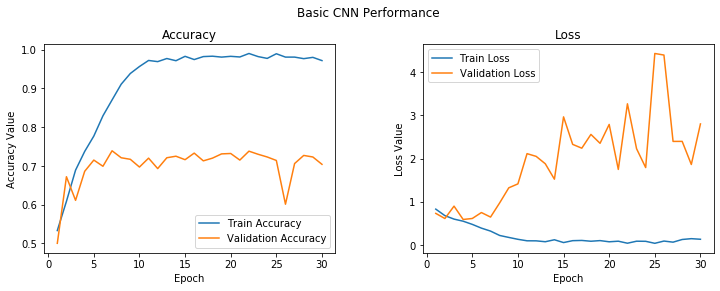

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

* 이 그래프는 과대적합의 특성을 보여줍니다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달합니다. 반면 검증 정확도는 70-72%에서 멈추었습니다. 검증 손실은 다섯 번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않았습니다. 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소합니다.
* 비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제입니다. 드롭아웃이나 가중치 감소(L2 규제) 및 데이터 증식과 같은 과대적합을 감소시킬 수 있는 여러 가지 기법들을 적용 해 볼 수 있습니다.

## 과적합 감소 : Drop-Out Regularization 기법을 적용
* CONV(F:3x3, 16) -> POOL(2x2) -> CONV(F3x3, 64) -> POOL(2x2) -> CONV(F3x3, 128) -> POOL(2x2) -> CONV(F3x3, 128) -> POOL(2x2) -> Flatten -> DENSE(512) -> DROP(0.3) -> DENSE(512) -> DROP(0.3) -> OUTPUT

In [18]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
........
model.add(Dense(512, activation='relu'))
........
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [19]:
# local:60분, colab:3분
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 3s 1ms/sample - loss: 0.7061 - acc: 0.5093 - val_loss: 0.7894 - val_acc: 0.5030
Epoch 2/30
3000/3000 [==============================] - 3s 873us/sample - loss: 0.6825 - acc: 0.6000 - val_loss: 0.6633 - val_acc: 0.5970
Epoch 3/30
3000/3000 [==============================] - 3s 873us/sample - loss: 0.6276 - acc: 0.6560 - val_loss: 0.6524 - val_acc: 0.6560
Epoch 4/30
3000/3000 [==============================] - 3s 877us/sample - loss: 0.5709 - acc: 0.7147 - val_loss: 0.5762 - val_acc: 0.6740
Epoch 5/30
3000/3000 [==============================] - 3s 871us/sample - loss: 0.5200 - acc: 0.7477 - val_loss: 0.5731 - val_acc: 0.7300
Epoch 6/30
3000/3000 [==============================] - 3s 878us/sample - loss: 0.4755 - acc: 0.7857 - val_loss: 0.5415 - val_acc: 0.7370
Epoch 7/30
3000/3000 [==============================] - 3s 875us/sample - loss: 0.4248 - acc: 0.8037 - val_loss: 0.5481 - val_

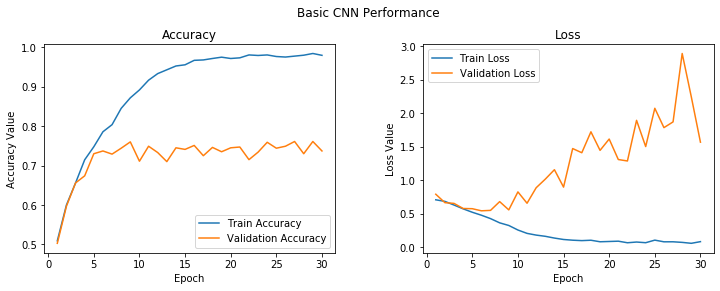

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_basic_cnn.h5')